In [ ]:
%pip install psycopg2

In [2]:
import psycopg2
from psycopg2 import Error

In [3]:
try:
    # Подключение к существующей базе данных
    connection = psycopg2.connect(user="mgpu_ico_st_17",
                                  password="B7NYfSVz",
                                  host="95.31.0.249",
                                  port="5432",
                                  database="bi_sql_data_student")

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()
    # Вывод информации о сервере PostgreSQL
    print("Информация о сервере PostgreSQL")
    print(connection.get_dsn_parameters(), "\n")
    # Выполнение SQL-запроса
    cursor.execute("SELECT version();")
    # Получение результата
    record = cursor.fetchone()
    print("Вы подключены к - ", record, "\n")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Информация о сервере PostgreSQL
{'user': 'mgpu_ico_st_17', 'channel_binding': 'prefer', 'dbname': 'bi_sql_data_student', 'host': '95.31.0.249', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'} 

Вы подключены к -  ('PostgreSQL 16.8 (Ubuntu 16.8-0ubuntu0.24.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0, 64-bit',) 

Соединение с PostgreSQL закрыто


In [4]:
try:
    # Подключение к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database="mybd")

    cursor = connection.cursor()
    # SQL-запрос для создания новой таблицы
    create_table_query = '''CREATE TABLE mobile
          (ID INT PRIMARY KEY     NOT NULL,
          MODEL           TEXT    NOT NULL,
          PRICE           REAL); '''
    # Выполнение команды: создание новой таблицы
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица успешно создана в PostgreSQL")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Таблица успешно создана в PostgreSQL
Соединение с PostgreSQL закрыто


In [5]:
try:
    # Подключение к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database="mybd")

    cursor = connection.cursor()
    # Выполнение SQL-запроса для вставки данных в таблицу
    insert_query = """ INSERT INTO mobile (ID, MODEL, PRICE) VALUES (1, 'Iphone12', 1100)"""
    cursor.execute(insert_query)
    connection.commit()
    print("1 запись успешно вставлена")

    # Получение результатов
    cursor.execute("SELECT * from mobile")
    record = cursor.fetchall()
    print("Результат:", record)

    # Выполнение SQL-запроса для обновления данных в таблице
    update_query = """Update mobile set price = 1500 where id = 1"""
    cursor.execute(update_query)
    connection.commit()
    count = cursor.rowcount
    print(count, "запись(ей) обновлено успешно")

    # Получение результатов
    cursor.execute("SELECT * from mobile")
    print("Результат:", cursor.fetchall())

    # Выполнение SQL-запроса для удаления данных из таблицы
    delete_query = """Delete from mobile where id = 1"""
    cursor.execute(delete_query)
    connection.commit()
    count = cursor.rowcount
    print(count, "запись(ей) удалено успешно")

    # Получение результатов
    cursor.execute("SELECT * from mobile")
    print("Результат:", cursor.fetchall())

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

1 запись успешно вставлена
Результат: [(1, 'Iphone12', 1100.0)]
1 запись(ей) обновлено успешно
Результат: [(1, 'Iphone12', 1500.0)]
1 запись(ей) удалено успешно
Результат: []
Соединение с PostgreSQL закрыто


# Practice 07. Упражнение/мини-проект
Информационная система больницы

## **Упражнение 1.** Подключитесь к серверу базы данных, создайте базу данных **medical_db** и таблицу **Hospital**

**Упражнение 1*.** Создайте таблицу **Doctor** и заполните эту таблицу данными в Postgre SQL

In [7]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database="mybd")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Создание базы данных
    cursor.execute("CREATE DATABASE medical_db TEMPLATE template0;")
    print("База данных 'medical_db' успешно создана")

    # Закрытие текущего соединения для подключения к новой базе данных
    close_connection(connection)

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы Hospital
    create_table_query = '''
    CREATE TABLE Hospital (
        Hospital_Id serial NOT NULL PRIMARY KEY,
        Hospital_Name VARCHAR (100) NOT NULL,
        Bed_Count serial
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Hospital' успешно создана")

    # Вставка данных в таблицу Hospital
    insert_query = '''
    INSERT INTO Hospital (Hospital_Id, Hospital_Name, Bed_Count)
    VALUES
    (1, 'Mayo Clinic', 200),
    (2, 'Cleveland Clinic', 400),
    (3, 'Johns Hopkins', 1000),
    (4, 'UCLA Medical Center', 1500);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Hospital'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

База данных 'medical_db' успешно создана
Соединение с PostgreSQL закрыто
Таблица 'Hospital' успешно создана
Данные успешно вставлены в таблицу 'Hospital'
Соединение с PostgreSQL закрыто


In [ ]:
CREATE TABLE Doctor (
    Doctor_Id serial NOT NULL PRIMARY KEY,
    Doctor_Name VARCHAR (100) NOT NULL,
    Hospital_Id serial NOT NULL,
    Joining_Date DATE NOT NULL,
    Speciality VARCHAR (100) NOT NULL,
    Salary INTEGER NOT NULL,
    Experience SMALLINT
);
ALTER TABLE Doctor
ADD CONSTRAINT fk_hospital
FOREIGN KEY (Hospital_Id) REFERENCES Hospital(Hospital_Id);

-- Вставка данных о докторах
INSERT INTO Doctor (Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience)
VALUES
('101', 'David', '1', '2005-02-10', 'Pediatric', 40000, NULL),
('102', 'Michael', '1', '2018-07-23', 'Oncologist', 20000, NULL),
('103', 'Susan', '2', '2016-05-19', 'Garnacologist', 25000, NULL),
('104', 'Robert', '2', '2017-12-28', 'Pediatric', 28000, NULL),
('105', 'Linda', '3', '2004-06-04', 'Garnacologist', 42000, NULL),
('106', 'William', '3', '2012-09-11', 'Dermatologist', 30000, NULL),
('107', 'Richard', '4', '2014-08-21', 'Garnacologist', 32000, NULL),
('108', 'Karen', '4', '2011-10-17', 'Radiologist', 30000, NULL),
('109', 'James', '1', '2022-01-15', 'Cardiologist', 45000, 5),
('110', 'Emily', '1', '2023-04-10', 'Orthopedic Surgeon', 50000, 3),
('111', 'Olivia', '2', '2021-09-05', 'Neurologist', 42000, 4),
('112', 'John', '2', '2024-02-18', 'Surgeon', 60000, 2),
('113', 'Sophia', '3', '2022-07-30', 'Urologist', 38000, 6),
('114', 'Daniel', '3', '2025-03-22', 'Pulmonologist', 47000, 1),
('115', 'Isabella', '4', '2023-11-01', 'Pediatrician', 41000, 3),
('116', 'Liam', '4', '2022-05-25', 'Dermatologist', 35000, 4),
('117', 'Mia', '1', '2024-06-17', 'Gastroenterologist', 53000, 2),
('118', 'Lucas', '2', '2023-01-12', 'Anesthesiologist', 46000, 3);

## **Упражнение 2.** Подключитесь к серверу базы данных и распечатайте его версию

In [8]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных
    database_name = 'medical_db'
    connection = get_connection(database_name)
    cursor = connection.cursor()

    # Выполнение запроса для получения версии базы данных
    cursor.execute("SELECT version();")
    db_version = cursor.fetchone()

    # Вывод версии базы данных
    print("Версия PostgreSQL:", db_version[0])

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения
    if connection:
        close_connection(connection)

Версия PostgreSQL: PostgreSQL 17.3 on x86_64-windows, compiled by msvc-19.42.34436, 64-bit
Соединение с PostgreSQL закрыто


## **Упражнение 3.** Получить информацию о больнице и врачах с использованием идентификаторов больницы и врача

In [9]:
def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_hospital_detail(hospital_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о больнице
        select_query = """SELECT * FROM Hospital WHERE Hospital_Id = %s"""
        cursor.execute(select_query, (hospital_id,))
        records = cursor.fetchall()

        # Вывод информации о больнице
        print("Печать записи о больнице:")
        for row in records:
            print("Hospital Id:", row[0])
            print("Hospital Name:", row[1])
            print("Bed Count:", row[2])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

def get_doctor_detail(doctor_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о докторе
        select_query = """SELECT * FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        records = cursor.fetchall()

        # Вывод информации о докторе
        print("Печать записи о докторе:")
        for row in records:
            print("Doctor Id:", row[0])
            print("Doctor Name:", row[1])
            print("Hospital Id:", row[2])
            print("Joining Date:", row[3])
            print("Specialty:", row[4])
            print("Salary:", row[5])
            print("Experience:", row[6])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Запросить данные о больнице с ID 2 и докторе с ID 106
print("Упражнение 3. Чтение информации о больнице и докторе\n")
get_hospital_detail(2)
print("\n")
get_doctor_detail(106)

Упражнение 3. Чтение информации о больнице и докторе

Печать записи о больнице:
Hospital Id: 2
Hospital Name: Cleveland Clinic
Bed Count: 400
Соединение с PostgreSQL закрыто


Печать записи о докторе:
Doctor Id: 106
Doctor Name: William
Hospital Id: 3
Joining Date: 2012-09-11
Specialty: Dermatologist
Salary: 30000
Experience: None
Соединение с PostgreSQL закрыто


## **Упражнение 4.** Получить список врачей по заданной специальности и зарплате

In [10]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Подключаемся к базе данных medical_db
database_name = 'medical_db'

def get_specialist_doctors_list(speciality, salary):
    try:
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения списка врачей по специальности и зарплате
        sql_select_query = """SELECT * FROM Doctor WHERE Speciality=%s AND Salary > %s"""
        cursor.execute(sql_select_query, (speciality, salary))
        records = cursor.fetchall()

        # Выводим информацию о врачах с указанной специальностью и зарплатой выше заданной
        print(f"Список врачей со специальностью {speciality} и зарплатой больше {salary}: \n")
        for row in records:
            print(f"Идентификатор врача: {row[0]}")
            print(f"Имя врача: {row[1]}")
            print(f"Идентификатор больницы: {row[2]}")
            print(f"Дата поступления: {row[3]}")
            print(f"Специальность: {row[4]}")
            print(f"Зарплата: {row[5]}")
            print(f"Опыт: {row[6]}\n")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Вопрос 4: Получение списка врачей по заданной специальности и зарплате
print("Вопрос 4: Получить список врачей по заданной специальности и зарплате\n")
get_specialist_doctors_list("Pediatric", 20000)

Вопрос 4: Получить список врачей по заданной специальности и зарплате

Список врачей со специальностью Pediatric и зарплатой больше 20000: 

Идентификатор врача: 101
Имя врача: David
Идентификатор больницы: 1
Дата поступления: 2005-02-10
Специальность: Pediatric
Зарплата: 40000
Опыт: None

Идентификатор врача: 104
Имя врача: Robert
Идентификатор больницы: 2
Дата поступления: 2017-12-28
Специальность: Pediatric
Зарплата: 28000
Опыт: None

Соединение с PostgreSQL закрыто


## **Упражнение 5.** Получить список врачей по заданной специальности и зарплате

In [11]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_doctors_by_hospital(hospital_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения всех врачей из указанной больницы
        select_query = """SELECT * FROM Doctor WHERE Hospital_Id = %s"""
        cursor.execute(select_query, (hospital_id,))
        records = cursor.fetchall()

        # Проверка и вывод результатов
        print(f"\nСписок врачей из больницы с ID {hospital_id}:\n")
        if records:
            for row in records:
                print("ID врача:", row[0])
                print("Имя врача:", row[1])
                print("ID больницы:", row[2])
                print("Дата начала работы:", row[3])
                print("Специальность:", row[4])
                print("Зарплата:", row[5])
                print("Опыт:", row[6], "\n")
        else:
            print("Врачи не найдены.")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Вызов функции для больницы с ID 3
print("Упражнение 5. Получение списка врачей из определённой больницы\n")
get_doctors_by_hospital(3)

Упражнение 5. Получение списка врачей из определённой больницы


Список врачей из больницы с ID 3:

ID врача: 105
Имя врача: Linda
ID больницы: 3
Дата начала работы: 2004-06-04
Специальность: Garnacologist
Зарплата: 42000
Опыт: None 

ID врача: 106
Имя врача: William
ID больницы: 3
Дата начала работы: 2012-09-11
Специальность: Dermatologist
Зарплата: 30000
Опыт: None 

ID врача: 113
Имя врача: Sophia
ID больницы: 3
Дата начала работы: 2022-07-30
Специальность: Urologist
Зарплата: 38000
Опыт: 6 

ID врача: 114
Имя врача: Daniel
ID больницы: 3
Дата начала работы: 2025-03-22
Специальность: Pulmonologist
Зарплата: 47000
Опыт: 1 

Соединение с PostgreSQL закрыто


## **Задание 6**. Обновить стаж врача в годах. Показать информацию до и после обновления.

Подготовка поля для обновления

In [12]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(doctor_id, new_experience):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж доктора с указанным ID
        update_query = """UPDATE Doctor SET Experience = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (new_experience, doctor_id))
        connection.commit()

        print(f"Стаж врача с ID {doctor_id} успешно обновлен на {new_experience} лет")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience
                          FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")
            print(f"Hospital Id: {doctor_record[2]}")
            print(f"Joining Date: {doctor_record[3]}")
            print(f"Speciality: {doctor_record[4]}")
            print(f"Salary: {doctor_record[5]}")
            print(f"Experience: {doctor_record[6]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим стаж врача с ID 101 на 3 года
print("Задание: Обновить стаж врачу с ID 101 на 3 года\n")
update_experience(101, 3)

Задание: Обновить стаж врачу с ID 101 на 3 года

Стаж врача с ID 101 успешно обновлен на 3 лет

Информация о докторе после обновления:
Doctor Id: 101
Doctor Name: David
Hospital Id: 1
Joining Date: 2005-02-10
Speciality: Pediatric
Salary: 40000
Experience: 3
Соединение с PostgreSQL закрыто


решение 6 задания

In [2]:
import psycopg2
from datetime import datetime

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_experience_in_years(doctor_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о докторе
        select_query = """SELECT Joining_Date, Experience FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        result = cursor.fetchone()

        if result:
            # Получаем дату присоединения и текущий опыт
            joining_date, current_experience = result

            # Если опыт уже установлен в базе данных, добавляем новые года
            if current_experience is not None:
                current_date = datetime.now()
                # Рассчитываем, сколько лет прошло с момента последнего обновления стажа
                years_since_last_update = current_date.year - (joining_date.year + current_experience)
                # Учитываем месяц и день, чтобы избежать пересчета в том же году
                if (current_date.month, current_date.day) < (joining_date.month, joining_date.day):
                    years_since_last_update -= 1
                new_experience = current_experience + years_since_last_update
                print(f"Текущий стаж (с учетом прошедших лет): {new_experience} лет")
                return new_experience
            else:
                # Если опыта нет, рассчитываем его с момента присоединения
                current_date = datetime.now()
                experience_years = current_date.year - joining_date.year - ((current_date.month, current_date.day) < (joining_date.month, joining_date.day))
                print(f"Расчитанный стаж: {experience_years} лет")
                return experience_years
        else:
            print("Доктор не найден")
            return None

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)
        return None

    finally:
        # Закрытие подключения
        close_connection(connection)

def update_experience(doctor_id):
    try:
        # Получаем стаж до обновления
        experience_before = get_experience_in_years(doctor_id)

        if experience_before is None:
            return

        print(f"Стаж до обновления: {experience_before} лет")

        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж в базе данных
        update_query = """UPDATE Doctor SET Experience = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (experience_before, doctor_id))
        connection.commit()

        # Получаем стаж после обновления
        experience_after = get_experience_in_years(doctor_id)

        print(f"Стаж после обновления: {experience_after} лет")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Вызов функции для обновления стажа врача с ID 101
print("Задание 6. Обновить стаж врача в годах и показать до и после\n")
update_experience(101)

Задание 6. Обновить стаж врача в годах и показать до и после

Текущий стаж (с учетом прошедших лет): 20 лет
Соединение с PostgreSQL закрыто
Стаж до обновления: 20 лет
Текущий стаж (с учетом прошедших лет): 20 лет
Соединение с PostgreSQL закрыто
Стаж после обновления: 20 лет
Соединение с PostgreSQL закрыто


## **Индивидуальные задания**. Вариант 17.

1. Создайте таблицу "Patients" с полями "ID", "NAME", "AGE", "DIAGNOSIS".	
2. Вставьте 10 пациентов в таблицу "Patients".

Решение заданий 1 и 2.

Помимо указанных в задании полей таблицы, добавим поле hospital_id, как внешний ключ с таблицей hospital.

In [4]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных medical_db
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы Patients
    create_table_query = '''
    CREATE TABLE Patients (
            Patient_Id SERIAL NOT NULL PRIMARY KEY,
            Patient_name VARCHAR(100) NOT NULL,
            Age INTEGER,
            Diagnosis VARCHAR(100),
            Hospital_Id serial,
            CONSTRAINT fk_hospital FOREIGN KEY (Hospital_Id) REFERENCES Hospital(Hospital_Id)
        );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Patients' успешно создана")

    # Вставка данных в таблицу Patients
    insert_query = '''
    INSERT INTO Patients (Patient_Id, Patient_Name, Age, Diagnosis, Hospital_Id)
    VALUES
        (1, 'Alice', 60, 'Hypertension', '1'),
        (2, 'Bob', 45, 'Diabetes', '2'),
        (3, 'Charlie', 70, 'Arthritis', '2'),
        (4, 'David', 55, 'Asthma', '1'),
        (5, 'Eve', 80, 'Heart Disease', '4'),
        (6, 'Frank', 65, 'Diabetes', '3'),
        (7, 'Grace', 50, 'Hypertension', '4'),
        (8, 'Hannah', 75, 'Arthritis', '2'),
        (9, 'Ivan', 40, 'Asthma', '1'),
        (10, 'Julia', 52, 'Heart Disease', '3');
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Patients'")
except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Таблица 'Patients' успешно создана
Данные успешно вставлены в таблицу 'Patients'
Соединение с PostgreSQL закрыто


3. Выведите всех пациентов старше 50 лет.

Решение задания 3.

In [10]:
import psycopg2
import csv

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(
        user="postgres",
        password="235532",
        host="localhost",
        port="5432",
        database=database_name
    )
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Подключаемся к базе данных medical_db
database_name = 'medical_db'

def get_patients_list(age, output_csv_file):
    try:
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения списка пациентов старше заданного возраста
        sql_select_query = """SELECT * FROM Patients WHERE Age > %s"""
        cursor.execute(sql_select_query, (age,))
        records = cursor.fetchall()

        # Выводим информацию о пациентах старше заданного возраста
        print(f"Список пациентов старше {age}: \n")
        for row in records:
            print(f"Идентификатор пациента: {row[0]}")
            print(f"Имя пациента: {row[1]}")
            print(f"Возраст: {row[2]}")
            print(f"Диагноз: {row[3]}")
            print(f"Идентификатор больницы: {row[4]}\n")

        # Сохраняем результаты в CSV-файл
        with open(output_csv_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            # Записываем заголовки столбцов
            writer.writerow(['Patient_Id', 'Patient_Name', 'Age', 'Diagnosis', 'Hospital_Id'])
            # Записываем данные
            writer.writerows(records)

        print(f"Результаты успешно сохранены в файл: {output_csv_file}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Задание 3: Получение списка пациентов старше 50 и сохранение в CSV
print("Задание 3: Получить список пациентов старше 50\n")
get_patients_list(50, 'patients_over_50.csv')

Задание 3: Получить список пациентов старше 50

Список пациентов старше 50: 

Идентификатор пациента: 1
Имя пациента: Alice
Возраст: 60
Диагноз: Hypertension
Идентификатор больницы: 1

Идентификатор пациента: 3
Имя пациента: Charlie
Возраст: 70
Диагноз: Arthritis
Идентификатор больницы: 2

Идентификатор пациента: 4
Имя пациента: David
Возраст: 55
Диагноз: Asthma
Идентификатор больницы: 1

Идентификатор пациента: 5
Имя пациента: Eve
Возраст: 80
Диагноз: Heart Disease
Идентификатор больницы: 4

Идентификатор пациента: 6
Имя пациента: Frank
Возраст: 65
Диагноз: Diabetes
Идентификатор больницы: 3

Идентификатор пациента: 8
Имя пациента: Hannah
Возраст: 75
Диагноз: Arthritis
Идентификатор больницы: 2

Идентификатор пациента: 10
Имя пациента: Julia
Возраст: 52
Диагноз: Heart Disease
Идентификатор больницы: 3

Результаты успешно сохранены в файл: patients_over_50.csv
Соединение с PostgreSQL закрыто


4. Обновите диагноз пациента с ID=2.

Решение задания 4.

In [8]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="235532",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_diagnosis(patient_id, new_diagnosis):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем диагноз пациента с указанным ID
        update_query = """UPDATE Patients SET Diagnosis = %s WHERE Patient_Id = %s"""
        cursor.execute(update_query, (new_diagnosis, patient_id))
        connection.commit()

        print(f"Диагноз пациента с ID {patient_id} успешно обновлен на {new_diagnosis}")

        # Печать данных о пациенте после обновления
        select_query = """SELECT Patient_Id, Patient_Name, Age, Diagnosis, Hospital_id
                          FROM Patients WHERE Patient_Id = %s"""
        cursor.execute(select_query, (patient_id,))
        patient_record = cursor.fetchone()

        if patient_record:
            print("\nИнформация о пациента после обновления:")
            print(f"Patient Id: {patient_record[0]}")
            print(f"Patient Name: {patient_record[1]}")
            print(f"Age: {patient_record[2]}")
            print(f"Diagnosis: {patient_record[3]}")
            print(f"Hospital_Id: {patient_record[4]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим диагноз пациента с ID 2 на Asthma
print("Задание: Обновить диагноз пациента с ID 2 на Asthma\n")
update_diagnosis(2, "Asthma")

Задание: Обновить диагноз пациента с ID 2 на Asthma

Диагноз пациента с ID 2 успешно обновлен на Asthma

Информация о пациента после обновления:
Patient Id: 2
Patient Name: Bob
Age: 45
Diagnosis: Asthma
Hospital_Id: 2
Соединение с PostgreSQL закрыто


5. Создайте линейный график для анализа возраста пациентов по диагнозам.

Решение задания 5.

Соединение с PostgreSQL закрыто


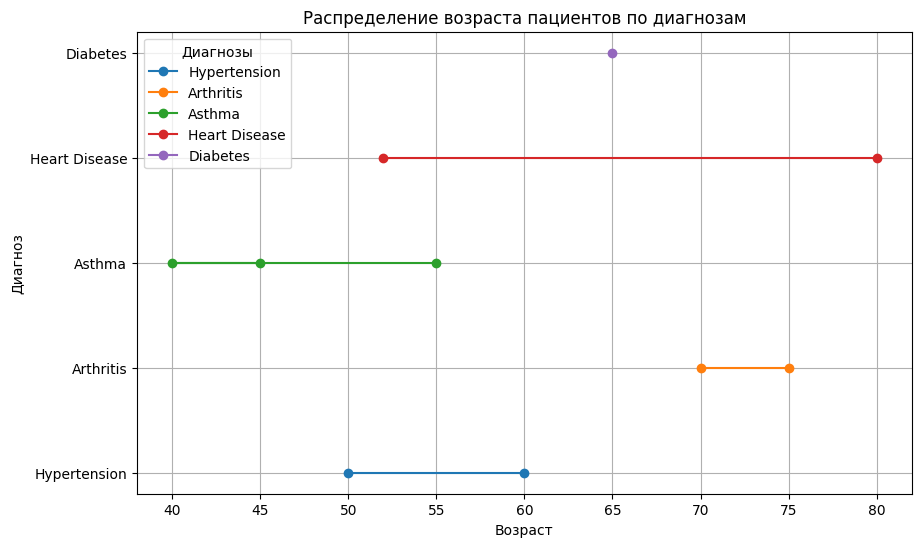

In [9]:
import psycopg2
import matplotlib.pyplot as plt

# Функция для получения подключения к базе данных
def get_connection(database_name):
    connection = psycopg2.connect(
        user="postgres",
        password="235532",
        host="localhost",
        port="5432",
        database=database_name
    )
    return connection

# Функция для закрытия подключения к базе данных
def close_connection(connection):
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Функция для получения данных о пациентах
def get_patient_data():
    try:
        # Подключаемся к базе данных
        connection = get_connection("medical_db")
        cursor = connection.cursor()

        # SQL-запрос для получения всех данных из таблицы Patients
        sql_select_query = "SELECT Age, Diagnosis FROM Patients"
        cursor.execute(sql_select_query)
        records = cursor.fetchall()

        # Закрываем соединение
        close_connection(connection)

        # Возвращаем данные
        return records

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)
        return None

# Функция для создания линейного графика
def create_age_diagnosis_plot():
    # Получаем данные из базы данных
    patient_data = get_patient_data()
    if not patient_data:
        print("Не удалось получить данные для построения графика.")
        return

    # Группируем данные по диагнозам
    diagnosis_data = {}
    for age, diagnosis in patient_data:
        if diagnosis not in diagnosis_data:
            diagnosis_data[diagnosis] = []
        diagnosis_data[diagnosis].append(age)

    # Создаем линейный график
    plt.figure(figsize=(10, 6))
    for diagnosis, ages in diagnosis_data.items():
        plt.plot(ages, [diagnosis] * len(ages), marker='o', linestyle='-', label=diagnosis)

    # Настройки графика
    plt.title('Распределение возраста пациентов по диагнозам')
    plt.xlabel('Возраст')
    plt.ylabel('Диагноз')
    plt.legend(title='Диагнозы')
    plt.grid(True)

    # Отображаем график
    plt.show()

# Вызов функции для создания графика
create_age_diagnosis_plot()